In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns

In [25]:
df = pd.read_csv("C:/AI_File/car_evaluation.csv",header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [26]:
df.columns=['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety',
       'output']

In [27]:
df.columns

Index(['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety',
       'output'],
      dtype='object')

In [28]:
# 결측치 확인
print("\n 결측값 확인:")
print(df.isnull().sum())


 결측값 확인:
price           0
maint           0
doors           0
persons         0
lug_capacity    0
safety          0
output          0
dtype: int64


In [29]:


# LabelEncoder 초기화

label_encoder = LabelEncoder()

# 특정 컬럼만 인코딩

columns_to_encode = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety',
       'output']  # 인코딩할 컬럼 리스트

for column in columns_to_encode:

    df[column] = label_encoder.fit_transform(df[column])

display(df)

,price,maint,doors,persons,lug_capacity,safety,output
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [32]:
# 레이블 갯수 확인 (변환 전)
df['output'].value_counts()

2    1210
0     384
1      69
3      65
Name: output, dtype: int64

In [33]:
X = df.drop('output', axis=1)
y = df['output']

In [34]:
X.head()

,price,maint,doors,persons,lug_capacity,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [35]:
y.value_counts()

2    1210
0     384
1      69
3      65
Name: output, dtype: int64

In [36]:
X

,price,maint,doors,persons,lug_capacity,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [37]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: output, Length: 1728, dtype: int32

# 딥러닝

In [38]:
#원-핫 인코딩
Y = pd.get_dummies(y).values

In [39]:
X= X.values

In [40]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1382, 6), (346, 6), (1382, 4), (346, 4))

In [43]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


In [46]:
#인공신경망 모델
model = Sequential()

model.add(Dense(32,input_shape=(6,),activation='relu')) 
#input_shape=(n,)에서 n은 한 개의 샘플이 가진 피처(열)의 개수

model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(4,activation='softmax'))

model.compile('Adam(learning_rate=0.005)','categorical_crossentropy',metrics=['accuracy'])
#다중 클래스 categorical_crossentropy 사용
#이진 클래스 binary_crossentropy 사용
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
Total params: 924
Trainable params: 924
Non-trainable params: 0
_________________________________________________________________


In [55]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
39/39 [==============================] - 0s 3ms/step - loss: 0.3195 - accuracy: 0.8930 - val_loss: 0.3229 - val_accuracy: 0.8561
Epoch 2/30
39/39 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.8809 - val_loss: 0.3090 - val_accuracy: 0.8849
Epoch 3/30
39/39 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8930 - val_loss: 0.3051 - val_accuracy: 0.8633
Epoch 4/30
39/39 [==============================] - 0s 2ms/step - loss: 0.2985 - accuracy: 0.8898 - val_loss: 0.2985 - val_accuracy: 0.8921
Epoch 5/30
39/39 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.8890 - val_loss: 0.2945 - val_accuracy: 0.8921
Epoch 6/30
39/39 [==============================] - 0s 2ms/step - loss: 0.2856 - accuracy: 0.9027 - val_loss: 0.2995 - val_accuracy: 0.8633
Epoch 7/30
39/39 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.8970 - val_loss: 0.2859 - val_accuracy: 0.8849
Epoch 8/30
39/39 [==

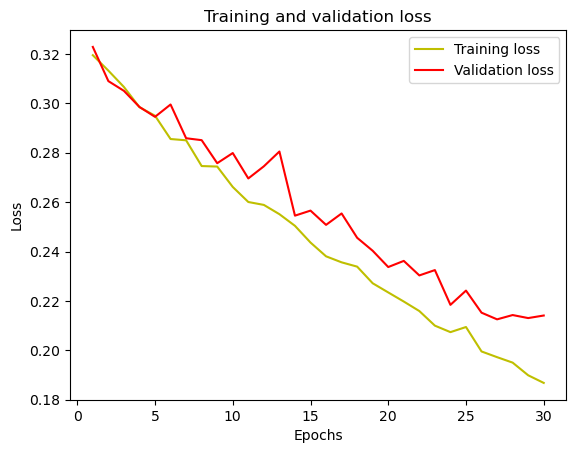

In [56]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

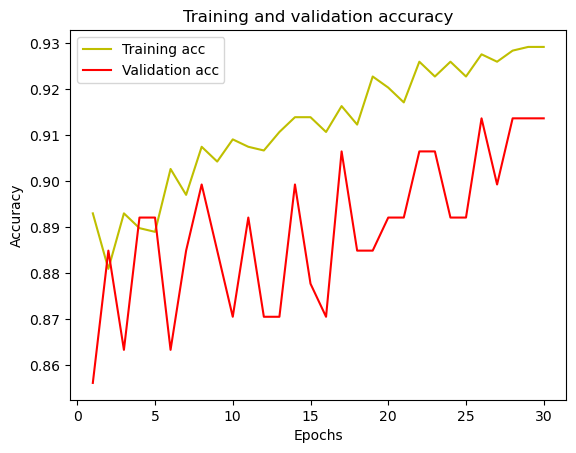

In [57]:

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [59]:

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77        79
           1       0.00      0.00      0.00        17
           2       0.93      0.97      0.95       240
           3       0.67      0.80      0.73        10

    accuracy                           0.88       346
   macro avg       0.59      0.64      0.61       346
weighted avg       0.84      0.88      0.86       346

[[ 62   0  16   1]
 [ 16   0   1   0]
 [  3   0 234   3]
 [  2   0   0   8]]


C:\Users\nikki\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikki\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikki\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
